In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f560aea4c884fb8593748eda08bb57f


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | pingliang
Processing Record 6 of Set 1 | sibolga
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | songea
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | dzhebariki-khaya
Processing Record 21 of Set 1 | sistranda
Processing Record 22 of Set 1 | yantal
Processing Record 2

Processing Record 39 of Set 4 | yanggu
Processing Record 40 of Set 4 | naples
Processing Record 41 of Set 4 | satitoa
City not found. Skipping...
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | houlton
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | berlevag
Processing Record 46 of Set 4 | belmonte
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 4 | nanyamba
Processing Record 50 of Set 4 | pemangkat
Processing Record 1 of Set 5 | ovalle
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | barsovo
Processing Record 4 of Set 5 | along
Processing Record 5 of Set 5 | caravelas
Processing Record 6 of Set 5 | sterling
Processing Record 7 of Set 5 | beyneu
Processing Record 8 of Set 5 | grand-santi
Processing Record 9 of Set 5 | aykhal
Processing Record 10 of Set 5 | petawawa
Processing Record 11 of Set 5 | christchurch
Processing

Processing Record 27 of Set 8 | jalu
Processing Record 28 of Set 8 | padang
Processing Record 29 of Set 8 | hovd
Processing Record 30 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 8 | upernavik
Processing Record 32 of Set 8 | brekstad
Processing Record 33 of Set 8 | mattawa
Processing Record 34 of Set 8 | quime
Processing Record 35 of Set 8 | vasteras
Processing Record 36 of Set 8 | leshukonskoye
Processing Record 37 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 39 of Set 8 | tongliao
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | litovko
Processing Record 42 of Set 8 | rio gallegos
Processing Record 43 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 8 | falam
Processing Record 45 of Set 8 | yeppoon
Processing Record 46 of Set 8 | nador
Processing Record 47 of Set 8 | kichera
Processing Record 48 of Set 8 | z

Processing Record 14 of Set 12 | gamba
Processing Record 15 of Set 12 | kasongo
Processing Record 16 of Set 12 | islahiye
Processing Record 17 of Set 12 | sedona
Processing Record 18 of Set 12 | tecoanapa
Processing Record 19 of Set 12 | bathsheba
Processing Record 20 of Set 12 | cam ranh
Processing Record 21 of Set 12 | ust-kuyga
Processing Record 22 of Set 12 | vila velha
Processing Record 23 of Set 12 | luwuk
Processing Record 24 of Set 12 | mmabatho
Processing Record 25 of Set 12 | saldanha
Processing Record 26 of Set 12 | kegayli
City not found. Skipping...
Processing Record 27 of Set 12 | sambava
Processing Record 28 of Set 12 | lolua
City not found. Skipping...
Processing Record 29 of Set 12 | aksu
Processing Record 30 of Set 12 | vadlapudi
Processing Record 31 of Set 12 | ihosy
Processing Record 32 of Set 12 | bijie
Processing Record 33 of Set 12 | jiaonan
Processing Record 34 of Set 12 | constantine
Processing Record 35 of Set 12 | gornopravdinsk
Processing Record 36 of Set 12

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,55.38,70,100,2.08,NZ,2021-01-31 17:09:27
1,Pevek,69.7008,170.3133,-27.85,84,75,1.88,RU,2021-01-31 17:09:27
2,Kaitangata,-46.2817,169.8464,60.01,91,100,1.99,NZ,2021-01-31 17:09:27
3,Bengkulu,-3.8004,102.2655,76.03,86,100,5.14,ID,2021-01-31 17:09:27
4,Pingliang,35.5392,106.6861,30.74,69,81,5.19,CN,2021-01-31 17:09:27
5,Sibolga,1.7427,98.7792,75.78,82,90,4.63,ID,2021-01-31 17:09:27
6,Lagoa,39.0500,-27.9833,61.92,91,99,28.32,PT,2021-01-31 17:09:28
7,Yellowknife,62.4560,-114.3525,-9.99,77,75,4.61,CA,2021-01-31 17:04:56
8,Georgetown,5.4112,100.3354,80.60,78,20,3.44,MY,2021-01-31 17:09:28
9,Provideniya,64.3833,-173.3000,-8.12,87,100,24.70,RU,2021-01-31 17:09:28


In [11]:
new_column_order = ["City","Country","Date","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-01-31 17:09:27,2021-01-31 17:09:27,-46.1927,168.8643,55.38,70,100,2.08
1,Pevek,RU,2021-01-31 17:09:27,2021-01-31 17:09:27,69.7008,170.3133,-27.85,84,75,1.88
2,Kaitangata,NZ,2021-01-31 17:09:27,2021-01-31 17:09:27,-46.2817,169.8464,60.01,91,100,1.99
3,Bengkulu,ID,2021-01-31 17:09:27,2021-01-31 17:09:27,-3.8004,102.2655,76.03,86,100,5.14
4,Pingliang,CN,2021-01-31 17:09:27,2021-01-31 17:09:27,35.5392,106.6861,30.74,69,81,5.19
...,...,...,...,...,...,...,...,...,...,...
565,Vredendal,ZA,2021-01-31 17:10:56,2021-01-31 17:10:56,-31.6683,18.5012,71.62,71,1,15.41
566,Shelburne,CA,2021-01-31 17:06:59,2021-01-31 17:06:59,44.0787,-80.2041,19.99,88,100,11.97
567,Puerto Leguizamo,CO,2021-01-31 17:10:56,2021-01-31 17:10:56,-0.1934,-74.7819,88.03,49,83,5.35
568,Tuy Hoa,VN,2021-01-31 17:10:56,2021-01-31 17:10:56,13.0833,109.3000,70.20,86,96,6.06


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

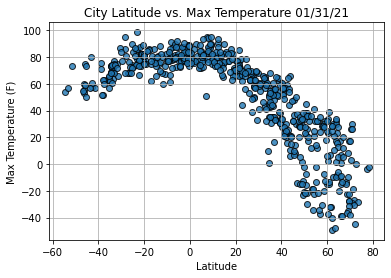

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

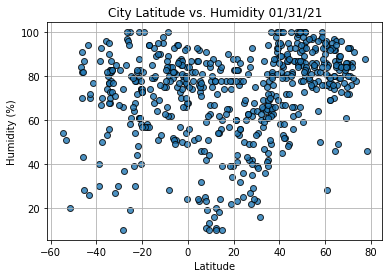

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

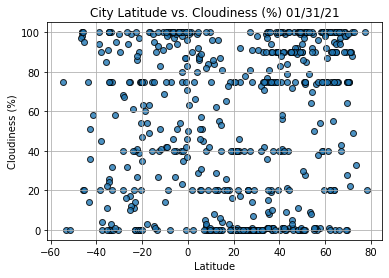

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

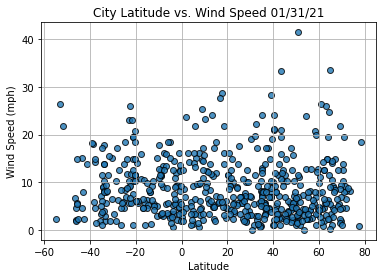

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

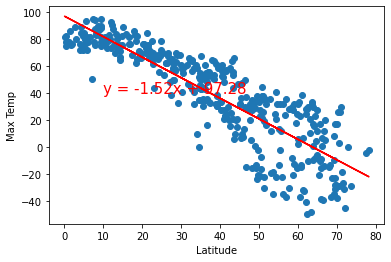

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

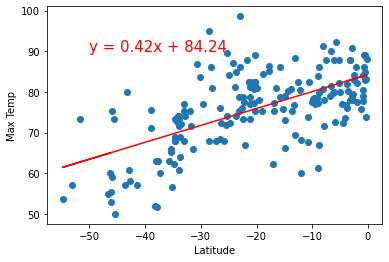

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

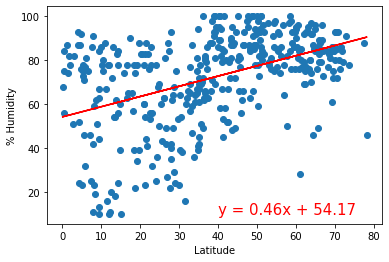

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

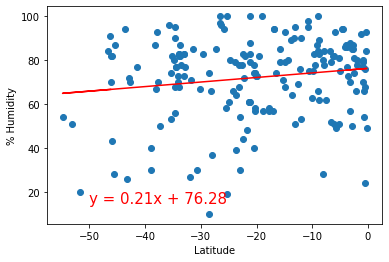

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

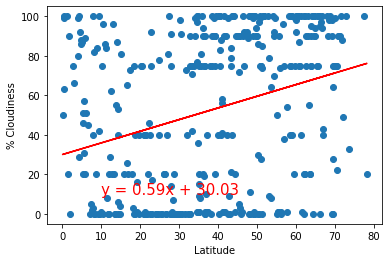

In [24]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,10))

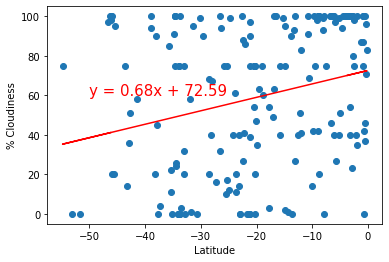

In [25]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

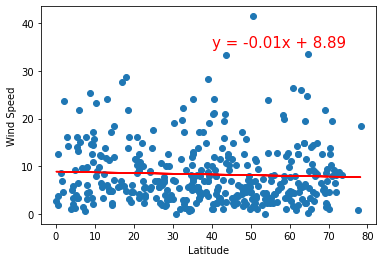

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

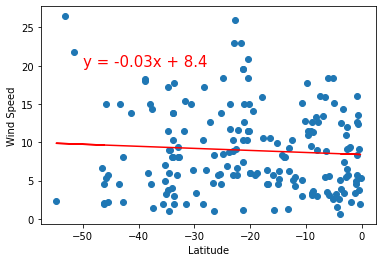

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))